# <b> <span style='color:#3A6D8C'>Time Series Forecasting</span></b>

## <b>A. <span style='color:#3A6D8C'>Proses Ekstraksi Data</span></b>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

- Interpretasi: Baris kode ini digunakan untuk menonaktifkan atau mengabaikan pesan peringatan (warnings) yang muncul selama eksekusi kode Python.
- Alasan: Warnings tidak selalu penting untuk dianalisis, terutama jika tidak memengaruhi hasil program. Fungsinya adalah menjaga output tetap bersih, sehingga lebih mudah fokus pada hasil utama.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstraksi data
data_sanitasi = pd.read_csv('Sanitasi Layak.csv')

# Tampilkan data
display(data_sanitasi)


Negara  Tahun  Persentase
0   Indonesia   2013       60.91
1   Indonesia   2014       61.08
2   Indonesia   2015       62.14
3   Indonesia   2016       67.80
4   Indonesia   2017       67.89
5   Indonesia   2018       69.27
6   Indonesia   2019       77.39
7   Indonesia   2020       79.53
8   Indonesia   2021       80.29
9   Indonesia   2022       80.92
10  Indonesia   2023       82.36

- Interpretasi:
  1. Import pandas:
Library pandas adalah alat utama untuk manipulasi data dalam Python.
  2. Membaca file CSV:
pd.read_csv() digunakan untuk membaca file CSV bernama 'Sanitasi Layak.csv' dan mengubahnya menjadi DataFrame, struktur data utama pandas.
  3. Menampilkan Data:
Fungsi display() digunakan untuk menampilkan isi DataFrame di output dengan format yang rapi.
- Alasan: Proses ekstraksi data adalah langkah awal dalam setiap pipeline machine learning untuk membaca, memahami, dan memproses data input. Data dari file CSV sering digunakan karena mudah diakses dan didukung oleh banyak library.
pandas digunakan karena kuat dan fleksibel untuk analisis data, sedangkan display() memastikan data dapat dilihat dengan jelas selama debugging atau eksplorasi awal.

## <b>B. <span style='color:#3A6D8C'>Filter Data yang Dibutuhkan</span></b>

In [ ]:
data_sanitasi_persentase = data_sanitasi[['Tahun', 'Persentase']]
display(data_sanitasi_persentase)

Tahun  Persentase
0    2013       60.91
1    2014       61.08
2    2015       62.14
3    2016       67.80
4    2017       67.89
5    2018       69.27
6    2019       77.39
7    2020       79.53
8    2021       80.29
9    2022       80.92
10   2023       82.36

- Interpretasi:
Data hanya dipilih untuk kolom Tahun dan Persentase menggunakan seleksi kolom pada DataFrame.
Fungsi display() menampilkan hasil filter dalam format tabel untuk validasi.
- Alasan:
Filtering diperlukan untuk fokus hanya pada kolom relevan yang akan digunakan dalam analisis. Dengan menghapus kolom yang tidak perlu, risiko noise atau kesalahan dalam analisis menjadi lebih kecil.
Menampilkan data membantu memastikan proses seleksi berjalan seperti yang diharapkan.

## <b>C. <span style='color:#3A6D8C'>Plot Time Series</span></b>

In [ ]:
# Import library plotly untuk visualisasi data
import numpy as np
import plotly.express as px

def plot_timeseries(
    data : pd.DataFrame,
    value : str,
    judul : str,
    warna : str = 'black',
    showxaxis : bool = False,
    showtrend : bool = False,
):
    fig = px.line(
        data_frame = data,
        x = data.index,
        y = value,
        color_discrete_sequence = [warna]
    )

    if(showtrend):
        # Hitung koefisien regresi linier
        coefficients = np.polyfit(range(len(data)), data[value].fillna(data[value].median()), 1)
        slope = coefficients[0]
        intercept = coefficients[1]

        # Tambahkan garis regresi ke plot
        fig.add_scatter(
            x = data.index,
            y = range(len(data)) * slope + intercept,
            mode = 'lines',
            line = dict(
                color = 'grey',
                dash = 'dash'
            )
        )

    if(showxaxis):
        fig.add_hline(
            y = 0,
            line = dict(
                color = 'LightSeaGreen',
                width = 2,
                dash = 'dash',
            ),
        )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = judul,
            font = dict(
                size = 24,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show()

In [ ]:
title = f"""
  <b><span style='color:#000435'>Persentase Sanitasi Layak<br>di Indonesia (Tahun 2013 - 2023) </span></b>
"""

plot_timeseries(
    data = data_sanitasi.set_index('Tahun'),
    value = 'Persentase',
    judul = title,
    warna = '#000435',
    showtrend = False,
)

- **Interpretasi Hasil**
  Grafik yang ditampilkan menunjukkan perkembangan sanitasi di Indonesia dari tahun 2013 hingga 2023, dan di tahun 2023, persentase sanitasi yang layak mencapai 82,2%. Ini berarti lebih dari separuh orang di Indonesia kini memiliki akses ke fasilitas sanitasi yang bersih dan aman, yang merupakan kabar baik. Garis tren dalam grafik juga menunjukkan bahwa sanitasi semakin membaik dari tahun ke tahun, sehingga bisa disimpulkan bahwa hampir 82 dari 100 orang di Indonesia sudah mendapatkan sanitasi yang layak.

## <b>D. <span style='color:#3A6D8C'>Set Index</span></b>

In [ ]:
# Mengonversi kolom 'Year' menjadi PeriodIndex
data_sanitasi_persentase['Tahun'] = pd.to_datetime(data_sanitasi_persentase['Tahun'], format='%Y')

# Menetapkan 'Year' sebagai indeks
data_sanitasi_persentase.set_index('Tahun', inplace=True)

- Interpretasi :

Kode Set Index digunakan untuk mempersiapkan data time series agar siap dianalisis dan divisualisasikan. Pertama, kolom Tahun diubah menjadi format waktu menggunakan pd.to_datetime(), sehingga Python dapat mengenali kolom ini sebagai data waktu yang valid. Setelah itu, kolom Tahun dijadikan sebagai indeks DataFrame menggunakan set_index(). Dengan menjadikannya indeks, data dapat diakses, diolah, dan dianalisis berdasarkan urutan waktu secara logis.

- Alasan :
    - Mempermudah Analisis Time Series: Indeks waktu diperlukan untuk metode seperti pengelompokan berdasarkan waktu, perhitungan perubahan rata-rata, atau identifikasi tren.
    - Visualisasi yang Lebih Baik: Grafik berbasis waktu membutuhkan indeks waktu untuk menampilkan data secara kronologis, sehingga hasil visualisasi lebih intuitif.
    - Kompatibilitas dengan Fungsi Manipulasi Waktu: Operasi seperti resampling, rolling mean, atau analisis musiman hanya berfungsi jika indeks berupa tipe waktu.

## <b>E. <span style='color:#3A6D8C'>Decompose</span></b>

In [ ]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Proses dekomposisi musiman
result = seasonal_decompose(
    data_sanitasi_persentase['Persentase']
)

- Interpretasi :
Library matplotlib digunakan untuk plotting, dan seasonal_decompose untuk memisahkan data time series Persentase menjadi tiga komponen utama: trend, seasonal, dan residual.

- Alasan :
Proses ini penting untuk memahami pola dalam data, seperti tren jangka panjang, pola musiman, dan variasi acak yang tidak dapat dijelaskan.

In [ ]:
# Definisikan komponen
data_plot = dict(
    data = [pd.DataFrame(result.trend), pd.DataFrame(result.seasonal), pd.DataFrame(result.resid)],
    value = ['trend', 'seasonal', 'resid'],
    color = ['#091057', '#024CAA', '#EC8305'],
    showtrend = [True, False, True]
)

# Lakukan plotting
for i in range(3):
    plot_timeseries(
        data = data_plot.get('data')[i],
        value = data_plot.get('value')[i],
        judul = f"<b><span style='color:{data_plot.get('color')[i]}'>{data_plot.get('value')[i].upper()}</span></b>",
        warna = data_plot.get('color')[i],
        showtrend = data_plot.get('showtrend')[i],
    )

**Interpretasi Hasil :**
1. **Tren**
Pada grafik Tren menunjukkan jika garis pada grafik ini cenderung stabil dan mendatar, hal ini mengindikasikan bahwa tidak ada perubahan signifikan dalam persentase sanitasi dari waktu ke waktu. Mungkin menunjukkan bahwa kondisi sanitasi tetap konsisten tanpa pertumbuhan atau penurunan yang jelas.

2.**Musiman**
grafik musiman menunjukkan garis yang mendatar, itu menunjukkan bahwa tidak ada pola musiman yang jelas dalam data sanitasi. Artinya, fluktuasi yang diharapkan berdasarkan musim tidak terlihat, sehingga kondisi sanitasi tidak terpengaruh oleh waktu atau periode tertentu dalam setahun.

3. Gambar Ketiga: Residual
Gambar ketiga menunjukkan komponen residual. Komponen ini menggambarkan variasi yang tidak dapat dijelaskan oleh tren atau pola musiman. Jika garis pada grafik ini juga stabil dan mendatar, ini menunjukkan bahwa tidak ada variabilitas yang signifikan dalam data di luar apa yang sudah dijelaskan oleh tren dan komponen musiman.

Kesimpulan Umum
Secara keseluruhan, ketiga grafik ini menunjukkan bahwa data sanitasi yang dianalisis tidak menunjukkan adanya pola yang signifikan baik dari segi tren, musiman, maupun residual. Hal ini bisa berarti bahwa kondisi sanitasi dalam data tersebut cenderung stabil dan tidak dipengaruhi oleh faktor-faktor yang berfluktuasi sepanjang waktu.

## <b>F. <span style='color:#3A6D8C'>Stasioneritas</span></b>

In [ ]:
# Import library yang dibutuhkan
from statsmodels.tsa import stattools

def uji_kpss(data, alpha):
    # Proses pengujian kpss
    kpss_test = stattools.kpss(
        data,
        regression = 'c',
        nlags = 'auto'
    )[ : 3]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(kpss_test[1] < alpha):
        kpss_test += ('H0 ditolak', 'Data terindikasi Non-Stasioner')
    else:
        kpss_test += ('H0 diterima', 'Data terindikasi Stasioner')

    # Jadikan dataframe
    output_kpss = pd.DataFrame({
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : kpss_test
    })

    return(output_kpss)

- Interpretasi :

    Kode ini menggunakan metode KPSS (Kwiatkowski-Phillips-Schmidt-Shin) untuk menguji apakah data bersifat stasioner, yang merupakan syarat penting dalam banyak model time series seperti ARIMA. Proses ini dilakukan dengan memeriksa nilai statistik, p-value, dan jumlah lag optimal dari data. Hasil uji kemudian diberi kesimpulan apakah data terindikasi stasioner atau tidak, berdasarkan nilai p-value. Outputnya disusun dalam bentuk DataFrame agar lebih terstruktur dan mudah dipahami.

- Alasan :
    
    - Mengidentifikasi Stasioneritas Data: Analisis time series memerlukan data stasioner untuk memastikan hasil prediksi yang stabil dan valid.
    - Kesimpulan Otomatis: Kode ini memberikan hasil dan interpretasi langsung apakah data memenuhi syarat sebagai data stasioner.
    - Output yang Terorganisasi: Menyusun hasil dalam DataFrame membantu pengguna membaca dan menganalisis informasi dengan lebih mudah.

In [ ]:
# Toleransi error 5%
alpha = 0.05

# Panggil fungsinya
kpss_result = uji_kpss(data_sanitasi_persentase['Persentase'], alpha)

# Tampilkan hasil
display(kpss_result)

Keterangan                       Nilai uji
0   Uji Statistik                        0.616319
1         p-value                        0.021153
2  Lags digunakan                               1
3       Hasil Uji                      H0 ditolak
4      Kesimpulan  Data terindikasi Non-Stasioner

**Interpretasi Hasil**

**Uji Statistik (0.616319):** Nilai ini menunjukkan hasil dari uji statistik yang digunakan. Dalam konteks analisis time series, ini biasanya berkaitan dengan pengujian stasioneritas, seperti Augmented Dickey-Fuller (ADF) atau Kwiatkowski-Phillips-Schmidt-Shin (KPSS).

**p-value (0.021153):** p-value ini lebih kecil dari tingkat signifikansi umum (misalnya 0.05). Hal ini menunjukkan bahwa ada cukup bukti untuk menolak hipotesis nol (H0).

**Lags digunakan (1):** Ini menunjukkan bahwa satu lag dari data digunakan dalam analisis uji. Ini penting untuk mempertimbangkan ketergantungan temporal dalam data.

**Hasil Uji (H0 ditolak): **Ini berarti hipotesis nol, yang biasanya menyatakan bahwa data stasioner, ditolak. Dengan kata lain, data menunjukkan adanya tren atau pola yang tidak tetap seiring waktu.

**Kesimpulan (Data terindikasi Non-Stasioner):** Kesimpulan ini menegaskan bahwa data yang diuji tidak bersifat stasioner, yang berarti ada fluktuasi yang signifikan dalam level rata-rata atau varians dari data tersebut. Ini adalah indikator penting bahwa model analisis lebih lanjut atau transformasi mungkin diperlukan untuk memastikan validitas analisis.

## <b>G. <span style='color:#3A6D8C'>Autocorelation Function</span></b>

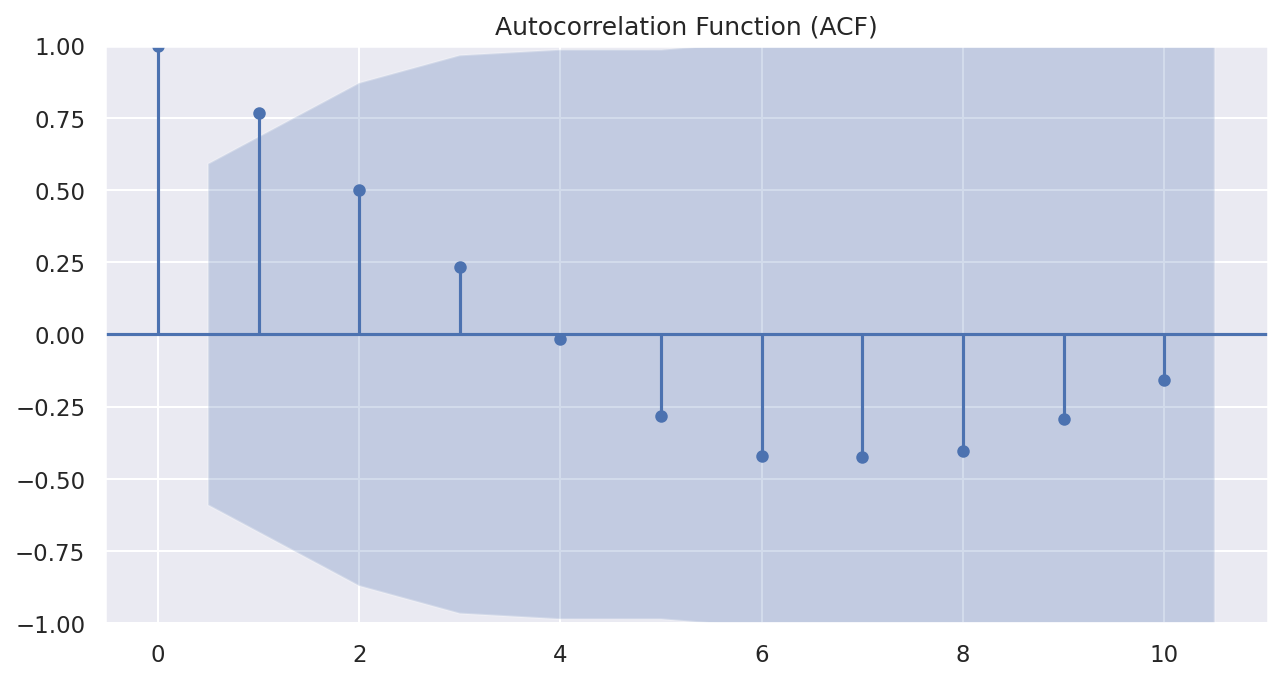

In [ ]:
# Import library seaborn dan matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Setting grafik
sns.set(
    rc={
        'figure.figsize': (10, 5),
        'figure.dpi': 150
    }
)

# Tentukan jumlah lag berdasarkan panjang data
max_lags = min(10, len(data_sanitasi_persentase['Persentase']) - 1)

# Pastikan data berbentuk Series
plot_acf(data_sanitasi_persentase['Persentase'].squeeze(), lags=max_lags)

# Tambahkan judul dan tampilkan grafik
plt.title('Autocorrelation Function (ACF)')
plt.show()

- Interpretasi
    Kode ini digunakan untuk menghitung dan memvisualisasikan fungsi autokorelasi (Autocorrelation Function) dari data Persentase pada DataFrame data_sanitasi. Fungsi ini membantu menganalisis hubungan data time series dengan lag-nya sendiri, yang berguna dalam memilih model time series yang tepat.
- Alasan :
    - Identifikasi Pola Autokorelasi: Grafik ACF membantu memahami sejauh mana nilai-nilai data dipengaruhi oleh nilai sebelumnya (lags), yang penting dalam memilih model time series seperti ARIMA.
    - Membatasi Lag Secara Dinamis: Penyesuaian jumlah lag berdasarkan panjang data memastikan grafik tetap relevan dan tidak terlalu kompleks.
    - Visualisasi yang Informatif: Penggunaan pengaturan grafik menghasilkan visualisasi yang tajam, jelas, dan mudah dianalisis.







## <b>H. <span style='color:#3A6D8C'>Split Data</span></b>

In [ ]:
# Hitung banyak data
banyak_data = data_sanitasi_persentase.shape[0]
print(f'Banyak data = {banyak_data}')

# Inisialisasi proporsi yang digunakan
train_proportion = 0.8
test_proportion = 1 - train_proportion

# Hitung banyak data train dan test
train_size = int(banyak_data * train_proportion)
test_size = banyak_data - train_size

# Tampilkan data
print(f'Banyak data train = {train_size}')
print(f'Banyak data test = {test_size}')

Banyak data = 11
Banyak data train = 8
Banyak data test = 3


- Interpretasi :

    Kode ini digunakan untuk membagi dataset data_sanitasi menjadi dua bagian: data latih (train) dan data uji (test). Pembagian ini penting dalam model machine learning dan time series untuk melatih model menggunakan data latih dan mengujinya dengan data yang belum terlihat (data uji).
- Alasan :
    - Pembagian Data untuk Pelatihan dan Pengujian: Pembagian data menjadi set latih dan uji adalah langkah fundamental dalam model machine learning dan time series. Model dilatih pada data latih dan diuji pada data uji untuk mengukur akurasi dan kinerjanya.
    - Menghindari Overfitting: Dengan menggunakan data uji yang berbeda dari data latih, kita dapat mengevaluasi seberapa baik model dapat menggeneralisasi pada data yang belum terlihat, menghindari overfitting.
    - Kontrol Proporsi Data: Dengan mengatur proporsi (80% untuk latih dan 20% untuk uji), kode ini memastikan pembagian data yang seimbang dan sesuai dengan praktik umum dalam machine learning.

In [ ]:
# Proses pembagian data
X_train = data_sanitasi_persentase.iloc[:train_size]
X_test = data_sanitasi_persentase.iloc[train_size:]

# Tampilkan data train
display(X_train)

Persentase
Tahun                 
2013-01-01       60.91
2014-01-01       61.08
2015-01-01       62.14
2016-01-01       67.80
2017-01-01       67.89
2018-01-01       69.27
2019-01-01       77.39
2020-01-01       79.53

- Interpretasi :
    Kode ini melakukan pembagian data data_sanitasi menjadi dua subset: data latih (X_train) dan data uji (X_test). Pembagian ini dilakukan berdasarkan ukuran yang telah dihitung sebelumnya, untuk memastikan model dapat dilatih dan diuji secara terpisah.
- Alasan :
    - Pembagian Data untuk Pelatihan dan Pengujian: Pembagian data ini sangat penting untuk memastikan bahwa model dilatih dengan data yang berbeda dari yang digunakan untuk pengujian. Ini memungkinkan evaluasi yang objektif terhadap kinerja model.
    - Pengelolaan Data yang Tepat: Dengan membagi data menggunakan train_size, kita dapat memastikan bahwa pembagian data dilakukan sesuai dengan proporsi yang telah ditentukan sebelumnya (80% untuk pelatihan dan 20% untuk pengujian).
    - Mempermudah Visualisasi: Menampilkan data latih setelah pembagian membantu memastikan bahwa pembagian dilakukan dengan benar dan memungkinkan analisis lebih lanjut terhadap data yang digunakan untuk pelatihan

In [ ]:
# Tampilkan data test
display(X_test)

Persentase
Tahun                 
2021-01-01       80.29
2022-01-01       80.92
2023-01-01       82.36

Kode ini digunakan untuk menampilkan data uji (X_test) yang telah dipisahkan dari dataset. Dengan menampilkan data uji, kita dapat memastikan bahwa pembagian data telah dilakukan dengan benar dan data siap digunakan untuk evaluasi model. Ini juga membantu memverifikasi apakah data uji sudah sesuai dengan yang diharapkan sebelum digunakan dalam pengujian model.

## <b>I. <span style='color:#3A6D8C'>Modelling</span></b>

### <b>I.1. <span style='color:#3A6D8C'>ARIMA (AutoRegressive Integrated Moving Average)</span></b>

ARIMA dirumuskan :

\begin{equation}
y_t = \mu + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t
\end{equation}


ARIMA(p, d, q) memiliki tiga parameter utama:

* p : Order dari model autoregressive (AR)
* d : Jumlah diferensiasi yang diperlukan untuk membuat data stasioner.
* q : Order dari model moving average (MA).

In [ ]:
# Import library plotly untuk visualisasi data
import plotly.express as px

def plot_prediksi(hasil_prediksi, x, y, mae, params = None):
    fig = px.line(
        data_frame = hasil_prediksi,
        x = x,
        y = y,
        color_discrete_sequence = ['#10375C', '#F3C623']
    )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Hasil Prediksi (MAE : {mae})<b><br><sup><sup><span style='color:#000435;font-size:10'>Parameter : {params}</span></sup></sup>",
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(rendere = 'colab')

Kode ini digunakan untuk memvisualisasikan hasil prediksi dengan menggunakan Plotly. Fungsi plot_prediksi membuat grafik garis yang menunjukkan hasil prediksi dibandingkan dengan data sebenarnya, serta menambahkan informasi tentang kesalahan prediksi (MAE) dan parameter model.

Visualisasi ini membantu untuk melihat perbandingan antara nilai yang diprediksi dan nilai yang sebenarnya dalam bentuk grafik yang jelas. Dengan menambahkan informasi MAE dan parameter model pada judul, pengguna bisa dengan cepat mengevaluasi kinerja model berdasarkan prediksi yang dihasilkan.

### <b>I.1.1. <span style='color:#3A6D8C'>Pencarian Parameter Terbaik ARIMA</span></b>

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from itertools import product

# Tentukan rentang nilai p, d, q yang akan diuji
p_values = range(0, 4)  # AR term
d_values = range(0, 4)  # Differencing term
q_values = range(0, 4)  # MA term

# Buat grid search untuk kombinasi parameter (p, d, q)
parameters = list(product(p_values, d_values, q_values))

# Fungsi untuk mengevaluasi model ARIMA
def evaluate_arima_model(train, test, p, d, q):
    try:
        # Fit model ARIMA
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()

        # Prediksi dengan model yang telah dilatih
        forecast = model_fit.forecast(steps = test.shape[0])

        #if(d > 0):
            # Mengembalikan hasil prediksi yang sudah di-differencing ke dalam bentuk asli
        #    forecast = X_train.iloc[-1] + forecast.cumsum()

        # Hitung error prediksi
        mae = mean_absolute_error(test, forecast)

        prediksi = test.copy()
        prediksi['predict'] = forecast.tolist()

        plot_prediksi(
            prediksi,
            x = prediksi.index,
            y = ['Persentase',	'predict'],
            mae = round(mae, 4),
            params = f'(p={p}, d={d}, q={q})'
        )

        return mae, forecast
    except:
        return np.nan, np.nan  # Jika terjadi error (misal model tidak konvergen), return NaN

# Grid search untuk parameter terbaik
best_mae_ARIMA = float('inf')
best_params_ARIMA = None

for param in parameters:
    p, d, q = param
    mae, forecast = evaluate_arima_model(X_train, X_test, p, d, q)
    if mae < best_mae_ARIMA:
        best_mae_ARIMA = mae
        best_params_ARIMA = param
        best_forecast_ARIMA = forecast

In [ ]:
# Output hasil terbaik
print(f"Best Parameters (p, d, q): {best_params_ARIMA}")
print(f"Best Mean Absolute Error: {best_mae_ARIMA}")

Best Parameters (p, d, q): (2, 1, 0)
Best Mean Absolute Error: 0.5900236228617833


Kode ini digunakan untuk melakukan pencarian parameter terbaik untuk model ARIMA melalui teknik grid search. Dengan menguji berbagai kombinasi nilai untuk parameter ARIMA (p, d, q), kode ini mencari parameter yang memberikan hasil prediksi dengan kesalahan terendah, diukur dengan Mean Absolute Error (MAE).

Proses ini melibatkan pemodelan ARIMA dengan berbagai kombinasi parameter, kemudian menghitung MAE untuk setiap model dan memilih yang memiliki MAE terendah. Hal ini penting untuk menemukan model yang paling akurat dan optimal untuk prediksi data time series.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(X_train, order=(best_params_ARIMA[0], best_params_ARIMA[1], best_params_ARIMA[2]))
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Persentase   No. Observations:                    8
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -19.030
Date:                Tue, 26 Nov 2024   AIC                             44.059
Time:                        12:30:10   BIC                             43.897
Sample:                    01-01-2013   HQIC                            42.053
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2828      1.920      0.147      0.883      -3.480       4.046
ar.L2          0.0975      2.802      0.035      0.972      -5.394       5.589
sigma2        13.2187     13.191      1.002      0.3

Kode ini digunakan untuk melatih model ARIMA menggunakan parameter terbaik yang ditemukan selama proses pencarian grid. Jika parameter terbaik (best_params_ARIMA) ditemukan, model ARIMA dilatih dengan parameter tersebut dan ringkasan model akan ditampilkan. Jika tidak ada parameter terbaik yang ditemukan, pesan kesalahan akan ditampilkan.

Kode ini penting untuk memastikan bahwa model ARIMA yang dilatih menggunakan parameter yang optimal, yang diperoleh dari pencarian grid. Dengan melatih model menggunakan parameter terbaik, kita dapat memperoleh hasil prediksi yang lebih akurat.

### <b>I2. <span style='color:#3A6D8C'>Double Exponential Smoothing</span></b>

DES dirumuskan sebagai :      

\begin{equation}
l_t = \alpha\cdot y_{t} + (1-\alpha)(l_{t-1}+b_{t-1})\\
b_t = \beta(l_{t}-l_{t-1})+(1-\beta)b_{t-1}\\
\hat{y}_{t+k} = l_t + k \cdot b_t
\end{equation}

DES(α, β) memiliki dua parameter utama:

* α : Smoothing Level
* β : Smoothing Trend

### <b>I.2.1. <span style='color:#3A6D8C'>Pencarian Parameter Terbaik DES</span></b>

In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from itertools import product

# Tentukan rentang nilai p, d, q yang akan diuji
alpha = np.arange(0, 1, 0.1)
beta = np.arange(0, 1, 0.1)

# Buat grid search untuk kombinasi parameter
parameters = list(product(alpha, beta))

# Fungsi untuk mengevaluasi model DSE
def evaluate_exponential_smoothing_model(train, test, alpha, beta):
    try:
        # Double Exponential Smoothing (Holt's Linear Trend)
        model = ExponentialSmoothing(train, trend='add', seasonal=None)
        model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta)

        # Forecast
        forecast = model_fit.forecast(steps=test.shape[0])

        # Hitung error prediksi
        mae = mean_absolute_error(test, forecast)

        prediksi = test.copy()
        prediksi['predict'] = forecast.tolist()

        plot_prediksi(
            prediksi,
            x = prediksi.index,
            y = ['Persentase',	'predict'],
            mae = round(mae, 4),
            params = f'(alpha={alpha:.2f}, beta={beta:.2f})'
        )

        return mae, forecast
    except:
        return np.nan, np.nan  # Jika terjadi error (misal model tidak konvergen), return NaN

# 4. Grid search untuk parameter terbaik
best_mae_DES = float('inf')
best_params_DES = None

for param in parameters:
    alpha, beta = param
    mae, forecast = evaluate_exponential_smoothing_model(X_train, X_test, alpha, beta)
    if mae < best_mae_DES:
        best_mae_DES = mae
        best_params_DES = param
        best_forecast_DES = forecast

Kode ini digunakan untuk mencari parameter terbaik bagi model Double Exponential Smoothing (Holt’s Linear Trend) menggunakan grid search untuk menguji kombinasi nilai alpha dan beta. Model ini diterapkan pada data deret waktu untuk peramalan dengan tren linier.

- Alasan Kode Ini Digunakan
    - Optimasi Parameter: Mencari kombinasi alpha dan beta yang menghasilkan kesalahan prediksi (MAE) terkecil.
    - Evaluasi Model: Menghitung MAE untuk memilih parameter terbaik.
    - Visualisasi: Memvisualisasikan hasil prediksi dibandingkan data asli untuk menilai kinerja model.
- Kenapa Penting
    - Meningkatkan Akurasi: Dengan memilih parameter yang optimal, model menghasilkan prediksi yang lebih akurat.
    - Memilih Model yang Tepat: Mencocokkan model dengan data tren linier untuk prediksi yang lebih handal.

### <b>I.2.2. <span style='color:#3A6D8C'>Parameter Terbaik DES</span></b>

In [ ]:
# Output hasil terbaik
print(f"Best Parameters (alpha, beta): ({best_params_DES[0]:.2f}, {best_params_DES[1]:.2f})")
print(f"Best Mean Absolute Error: {best_mae_DES}")

Best Parameters (alpha, beta): (0.10, 0.80)
Best Mean Absolute Error: 2.0991975880762843


Kode ini digunakan untuk menampilkan hasil terbaik dari pencarian parameter untuk model ARIMA atau Exponential Smoothing, termasuk parameter yang dipilih (alpha, beta) dan Mean Absolute Error (MAE) yang dihasilkan.

- Interpretasi
    - Menampilkan Parameter Terbaik: Kode ini mencetak parameter terbaik yang ditemukan dalam proses pencarian, yaitu nilai alpha dan beta yang memberikan hasil peramalan terbaik.
    - Menampilkan MAE Terbaik: MAE terbaik juga dicetak, yang menggambarkan tingkat kesalahan prediksi terendah yang tercapai dengan parameter tersebut.
- Alasan Kode Ini Digunakan
    - Evaluasi Hasil Pencarian Parameter: Output ini memungkinkan kita untuk mengetahui parameter yang menghasilkan model terbaik berdasarkan kesalahan prediksi yang terukur (MAE).
    - Validasi Kinerja Model: Dengan menampilkan parameter dan MAE terbaik, kita dapat memastikan bahwa model yang digunakan memiliki kinerja terbaik dari sekian banyak kombinasi yang diuji.

### <b>I.2.3. <span style='color:#3A6D8C'>Model DES dengan Best Parameter</span></b>

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ARIMA model
model = ExponentialSmoothing(X_train, trend='add', seasonal=None)
model_fit = model.fit(smoothing_level = best_params_DES[0], smoothing_trend = best_params_DES[1])

# Ringkasan model
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Persentase   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                             38.945
Optimized:                         True   AIC                             20.662
Trend:                         Additive   BIC                             20.979
Seasonal:                          None   AICC                           104.662
Seasonal Periods:                  None   Date:                 Tue, 26 Nov 2024
Box-Cox:                          False   Time:                         12:31:37
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
smoothing_trend            0.80000

Kode ini digunakan untuk melatih model Exponential Smoothing (Holt’s Linear Trend) pada data pelatihan (X_train) dengan parameter yang terbaik yang ditemukan sebelumnya, yaitu alpha dan beta, dan kemudian menampilkan ringkasan dari model yang telah dilatih.

- Interpretasi
    - Melatih Model: Model Exponential Smoothing diterapkan pada data pelatihan menggunakan parameter alpha (untuk smoothing level) dan beta (untuk smoothing tren) yang telah dioptimalkan sebelumnya.
    - Ringkasan Model: Setelah model dilatih, kode ini menampilkan ringkasan dari model untuk memberikan gambaran tentang parameter yang digunakan dan kualitas model berdasarkan data pelatihan.
- Alasan Kode Ini Digunakan
    - Membangun Model yang Ditingkatkan: Kode ini menggunakan parameter terbaik untuk melatih model, memastikan model memberikan hasil prediksi yang optimal.
    - Evaluasi Model: Dengan menampilkan ringkasan model, kita dapat melihat metrik evaluasi seperti koefisien, statistik, dan informasi lain yang relevan untuk memeriksa performa model

### <b>I.3. <span style='color:#3A6D8C'>FB Prophet</span></b>

In [ ]:
X_train = X_train.reset_index()

# Untuk fbprophet kolom tanggal diberi nama ds dan kolom nilai diberi nama y
X_train = X_train.rename(columns = {
    'Tahun' : 'ds',
    'Persentase' : 'y'
})

Kode ini digunakan untuk mempersiapkan data pelatihan (X_train) agar bisa digunakan dalam model FBProphet dengan mereset indeks dan mengganti nama kolom sesuai format yang dibutuhkan oleh FBProphet. Pertama, indeks direset untuk mengubahnya menjadi kolom biasa, lalu kolom Tahun diganti namanya menjadi ds dan kolom Persentase diganti menjadi y, sesuai dengan format yang dibutuhkan oleh FBProphet.

Kode ini penting untuk memastikan bahwa data yang digunakan sesuai dengan format yang diperlukan oleh FBProphet. Dengan mereset indeks dan mengganti nama kolom, data siap diproses oleh FBProphet untuk analisis dan prediksi.

### <b>I.3.1. <span style='color:#3A6D8C'>Pencarian Parameter Terbaik FB Prophet</span></b>

In [ ]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error
from datetime import timedelta

# Menentukan parameter grid untuk tuning
param_grid = {
    'daily_seasonality': [False, True],
    'weekly_seasonality': [False, True],
    'yearly_seasonality': [False, True],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1, 10, 20],
    'seasonality_mode' : ['additive', 'multiplicative'],
}

# Menyimpan hasil
results = list()

# Melakukan grid search
for params in ParameterGrid(param_grid):
    model = Prophet(**params)
    model.fit(X_train)

    # Membuat prediksi
    future = model.make_future_dataframe(periods = X_test.shape[0], freq='Y')
    forecast = model.predict(future)

    # Menghitung MAE untuk data test
    mae = mean_absolute_error(X_test['Persentase'], forecast.iloc[train_size:]['yhat'])
    results.append({'params': params, 'mae': mae})

    forecast_test = forecast.iloc[train_size:][['ds', 'yhat']]
    forecast_test['ds'] = forecast_test['ds'].apply(lambda x : x + timedelta(days=1) if x.day == 31 else x)

    hasil_prediksi = X_test.reset_index().merge(forecast_test, left_on = 'Tahun', right_on = 'ds', how = 'left').drop('ds', axis = 1)

    plot_prediksi(
        hasil_prediksi,
        x = 'Tahun',
        y = ['Persentase', 'yhat'],
        mae = round(mae, 4),
        params = params
    )

    if(len(results) == 1):
        best_mae = mae
        best_params = params
        best_forecast = forecast
    else:
        if(mae < best_mae):
            best_mae = mae
            best_params = params
            best_forecast = forecast

INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/bvr2jze1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0oyttfen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20102', 'data', 'file=/tmp/tmpw53zb6h6/bvr2jze1.json', 'init=/tmp/tmpw53zb6h6/0oyttfen.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model5rn0nfmc/prophet_model-20241126123143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/qekxkqfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_cd6x09w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42186', 'data', 'file=/tmp/tmpw53zb6h6/qekxkqfy.json', 'init=/tmp/tmpw53zb6h6/_cd6x09w.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model1eldavmu/prophet_model-20241126123144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hksad987.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0qhf69ap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13775', 'data', 'file=/tmp/tmpw53zb6h6/hksad987.json', 'init=/tmp/tmpw53zb6h6/0qhf69ap.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model0h8cs_dw/prophet_model-20241126123144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/1l6y_484.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mhwpqt9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46025', 'data', 'file=/tmp/tmpw53zb6h6/1l6y_484.json', 'init=/tmp/tmpw53zb6h6/mhwpqt9l.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model4xh31oby/prophet_model-20241126123144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/233b_fo5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/shv6gxrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1542', 'data', 'file=/tmp/tmpw53zb6h6/233b_fo5.json', 'init=/tmp/tmpw53zb6h6/shv6gxrj.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelm2wea5tg/prophet_model-20241126123153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ev0ufgy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/gvralt1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96440', 'data', 'file=/tmp/tmpw53zb6h6/ev0ufgy2.json', 'init=/tmp/tmpw53zb6h6/gvralt1t.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelq45ex5jf/prophet_model-20241126123153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/tw0kisl3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/jfh2vwqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17029', 'data', 'file=/tmp/tmpw53zb6h6/tw0kisl3.json', 'init=/tmp/tmpw53zb6h6/jfh2vwqw.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelr37tsldg/prophet_model-20241126123153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/6kqovh3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/f0uda_86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9953', 'data', 'file=/tmp/tmpw53zb6h6/6kqovh3l.json', 'init=/tmp/tmpw53zb6h6/f0uda_86.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelqbuw1r6l/prophet_model-20241126123154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:31:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/dndk8pch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/5z8y7gs5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74572', 'data', 'file=/tmp/tmpw53zb6h6/dndk8pch.json', 'init=/tmp/tmpw53zb6h6/5z8y7gs5.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model1z0jy514/prophet_model-20241126123203.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/u8_squzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/066km_u5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67098', 'data', 'file=/tmp/tmpw53zb6h6/u8_squzq.json', 'init=/tmp/tmpw53zb6h6/066km_u5.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model3ehn1u7m/prophet_model-20241126123204.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/50zxpcu5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/r2p1upny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98051', 'data', 'file=/tmp/tmpw53zb6h6/50zxpcu5.json', 'init=/tmp/tmpw53zb6h6/r2p1upny.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelvvwc43fu/prophet_model-20241126123205.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/okwi_hyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/dv7w1pwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81843', 'data', 'file=/tmp/tmpw53zb6h6/okwi_hyr.json', 'init=/tmp/tmpw53zb6h6/dv7w1pwu.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelt417f8ee/prophet_model-20241126123205.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/obe8ka45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/vrnar0lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46007', 'data', 'file=/tmp/tmpw53zb6h6/obe8ka45.json', 'init=/tmp/tmpw53zb6h6/vrnar0lw.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelcplkyscy/prophet_model-20241126123225.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/bd7s3e55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/wgh5xolv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17133', 'data', 'file=/tmp/tmpw53zb6h6/bd7s3e55.json', 'init=/tmp/tmpw53zb6h6/wgh5xolv.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelcvnhw2th/prophet_model-20241126123225.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/kw15rboh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0uefj_4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5948', 'data', 'file=/tmp/tmpw53zb6h6/kw15rboh.json', 'init=/tmp/tmpw53zb6h6/0uefj_4p.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modellgw1lyr_/prophet_model-20241126123225.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/v8177yf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3io1ktll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78907', 'data', 'file=/tmp/tmpw53zb6h6/v8177yf5.json', 'init=/tmp/tmpw53zb6h6/3io1ktll.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model850lqmip/prophet_model-20241126123226.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/nmxxwp8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/w4haqzj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55976', 'data', 'file=/tmp/tmpw53zb6h6/nmxxwp8h.json', 'init=/tmp/tmpw53zb6h6/w4haqzj3.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modells15ecch/prophet_model-20241126123231.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/q0xkmnf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/4hyu8rj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50821', 'data', 'file=/tmp/tmpw53zb6h6/q0xkmnf3.json', 'init=/tmp/tmpw53zb6h6/4hyu8rj0.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model67gocptp/prophet_model-20241126123231.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/aj7vikgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2x757lwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72099', 'data', 'file=/tmp/tmpw53zb6h6/aj7vikgw.json', 'init=/tmp/tmpw53zb6h6/2x757lwe.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelra3ko5on/prophet_model-20241126123232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xyxs0prw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/w8hh6eod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32615', 'data', 'file=/tmp/tmpw53zb6h6/xyxs0prw.json', 'init=/tmp/tmpw53zb6h6/w8hh6eod.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model3oc5phpv/prophet_model-20241126123232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_0nosmgf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/a8o66kyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89342', 'data', 'file=/tmp/tmpw53zb6h6/_0nosmgf.json', 'init=/tmp/tmpw53zb6h6/a8o66kyr.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelt086naga/prophet_model-20241126123233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/pfvi7lf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/b5e5e845.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37161', 'data', 'file=/tmp/tmpw53zb6h6/pfvi7lf5.json', 'init=/tmp/tmpw53zb6h6/b5e5e845.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelhwlj3e5c/prophet_model-20241126123233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/y74xxiq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/6fdyp_ga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84007', 'data', 'file=/tmp/tmpw53zb6h6/y74xxiq1.json', 'init=/tmp/tmpw53zb6h6/6fdyp_ga.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelwv01ierw/prophet_model-20241126123233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/1q_lx5l0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/5fcnvniq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33999', 'data', 'file=/tmp/tmpw53zb6h6/1q_lx5l0.json', 'init=/tmp/tmpw53zb6h6/5fcnvniq.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelx6dtght3/prophet_model-20241126123234.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/grpbkuqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/04mfjvbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35123', 'data', 'file=/tmp/tmpw53zb6h6/grpbkuqp.json', 'init=/tmp/tmpw53zb6h6/04mfjvbj.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelj3mbr1c0/prophet_model-20241126123235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/w25qq0ts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/l1ttqkyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20390', 'data', 'file=/tmp/tmpw53zb6h6/w25qq0ts.json', 'init=/tmp/tmpw53zb6h6/l1ttqkyz.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_models2od6a_g/prophet_model-20241126123235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/d2es_vqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o25goawl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88424', 'data', 'file=/tmp/tmpw53zb6h6/d2es_vqe.json', 'init=/tmp/tmpw53zb6h6/o25goawl.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelhe1zevaq/prophet_model-20241126123235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/8pbvhmvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/h1lo7qa3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81508', 'data', 'file=/tmp/tmpw53zb6h6/8pbvhmvx.json', 'init=/tmp/tmpw53zb6h6/h1lo7qa3.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelmhrs4co2/prophet_model-20241126123235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xxe5d88o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2td5g5fh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66876', 'data', 'file=/tmp/tmpw53zb6h6/xxe5d88o.json', 'init=/tmp/tmpw53zb6h6/2td5g5fh.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelk71rwsll/prophet_model-20241126123244.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/m344idlj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_aim0msc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24079', 'data', 'file=/tmp/tmpw53zb6h6/m344idlj.json', 'init=/tmp/tmpw53zb6h6/_aim0msc.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model_ggamrcl/prophet_model-20241126123245.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/iabvklai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/i8fqabty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52723', 'data', 'file=/tmp/tmpw53zb6h6/iabvklai.json', 'init=/tmp/tmpw53zb6h6/i8fqabty.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelgnr694gt/prophet_model-20241126123245.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/d4poq9_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/r11wp2yg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79507', 'data', 'file=/tmp/tmpw53zb6h6/d4poq9_8.json', 'init=/tmp/tmpw53zb6h6/r11wp2yg.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeli_5oa_w7/prophet_model-20241126123245.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/itzu_uqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ljmiuls0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34431', 'data', 'file=/tmp/tmpw53zb6h6/itzu_uqr.json', 'init=/tmp/tmpw53zb6h6/ljmiuls0.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelc5yy7ty9/prophet_model-20241126123247.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ouqvec7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/7ewx20_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90992', 'data', 'file=/tmp/tmpw53zb6h6/ouqvec7l.json', 'init=/tmp/tmpw53zb6h6/7ewx20_9.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelkw2uqqas/prophet_model-20241126123248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/uqhw2j0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hzi563bn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4766', 'data', 'file=/tmp/tmpw53zb6h6/uqhw2j0b.json', 'init=/tmp/tmpw53zb6h6/hzi563bn.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model_epaqluu/prophet_model-20241126123248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/trtwfdft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o84e6p4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91859', 'data', 'file=/tmp/tmpw53zb6h6/trtwfdft.json', 'init=/tmp/tmpw53zb6h6/o84e6p4u.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelexqgoaju/prophet_model-20241126123248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/l0ft4epr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/k62o4b83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69005', 'data', 'file=/tmp/tmpw53zb6h6/l0ft4epr.json', 'init=/tmp/tmpw53zb6h6/k62o4b83.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelpe20pxw6/prophet_model-20241126123252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/94iuwswj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/fx3lprky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53134', 'data', 'file=/tmp/tmpw53zb6h6/94iuwswj.json', 'init=/tmp/tmpw53zb6h6/fx3lprky.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelyczouy9u/prophet_model-20241126123252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/r_cfo36q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_h_2f2yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55985', 'data', 'file=/tmp/tmpw53zb6h6/r_cfo36q.json', 'init=/tmp/tmpw53zb6h6/_h_2f2yv.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeli28rmkde/prophet_model-20241126123252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xvgy3770.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/dorrv3q9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49092', 'data', 'file=/tmp/tmpw53zb6h6/xvgy3770.json', 'init=/tmp/tmpw53zb6h6/dorrv3q9.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelokcul21i/prophet_model-20241126123253.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ocz_2iyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/uviriha1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49509', 'data', 'file=/tmp/tmpw53zb6h6/ocz_2iyz.json', 'init=/tmp/tmpw53zb6h6/uviriha1.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelt5uz_vy7/prophet_model-20241126123300.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0s7k1n0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/jy6t14sl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95584', 'data', 'file=/tmp/tmpw53zb6h6/0s7k1n0n.json', 'init=/tmp/tmpw53zb6h6/jy6t14sl.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model_51651lh/prophet_model-20241126123300.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/n5_910ku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/5lcsu7de.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29837', 'data', 'file=/tmp/tmpw53zb6h6/n5_910ku.json', 'init=/tmp/tmpw53zb6h6/5lcsu7de.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelrfnnie7y/prophet_model-20241126123300.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/8zjhkzu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/pxj585zw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72212', 'data', 'file=/tmp/tmpw53zb6h6/8zjhkzu_.json', 'init=/tmp/tmpw53zb6h6/pxj585zw.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelg1648wt9/prophet_model-20241126123301.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ubm6xfqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/4rqm8lh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23554', 'data', 'file=/tmp/tmpw53zb6h6/ubm6xfqh.json', 'init=/tmp/tmpw53zb6h6/4rqm8lh2.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelav1n32h4/prophet_model-20241126123302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/erh5e4d9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/iiozpwmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70470', 'data', 'file=/tmp/tmpw53zb6h6/erh5e4d9.json', 'init=/tmp/tmpw53zb6h6/iiozpwmn.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model2s43mxhj/prophet_model-20241126123302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ibizlim5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mc_ewznw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33091', 'data', 'file=/tmp/tmpw53zb6h6/ibizlim5.json', 'init=/tmp/tmpw53zb6h6/mc_ewznw.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model5fgyhn30/prophet_model-20241126123302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/l3uqx4w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/pf3cr5ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31789', 'data', 'file=/tmp/tmpw53zb6h6/l3uqx4w5.json', 'init=/tmp/tmpw53zb6h6/pf3cr5ty.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modell0oz6vw6/prophet_model-20241126123303.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/fknvfrgh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/235w7p16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23134', 'data', 'file=/tmp/tmpw53zb6h6/fknvfrgh.json', 'init=/tmp/tmpw53zb6h6/235w7p16.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelunrrv399/prophet_model-20241126123304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/24779arz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/z52b84ys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8855', 'data', 'file=/tmp/tmpw53zb6h6/24779arz.json', 'init=/tmp/tmpw53zb6h6/z52b84ys.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelq8h8_2wm/prophet_model-20241126123304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/btt1eg75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ausn86d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33254', 'data', 'file=/tmp/tmpw53zb6h6/btt1eg75.json', 'init=/tmp/tmpw53zb6h6/ausn86d3.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelf6ywl45b/prophet_model-20241126123304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/iwfkv2qk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/7yb06kf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42808', 'data', 'file=/tmp/tmpw53zb6h6/iwfkv2qk.json', 'init=/tmp/tmpw53zb6h6/7yb06kf3.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelux0xrbdk/prophet_model-20241126123308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/t56tmf0x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/x2qla7hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44363', 'data', 'file=/tmp/tmpw53zb6h6/t56tmf0x.json', 'init=/tmp/tmpw53zb6h6/x2qla7hu.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelv8b7fbb7/prophet_model-20241126123318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ozjpgi9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/4i5il3qe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48180', 'data', 'file=/tmp/tmpw53zb6h6/ozjpgi9s.json', 'init=/tmp/tmpw53zb6h6/4i5il3qe.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeljlcvf_ko/prophet_model-20241126123318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/1o6vocgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/yzoaizhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1048', 'data', 'file=/tmp/tmpw53zb6h6/1o6vocgo.json', 'init=/tmp/tmpw53zb6h6/yzoaizhe.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model__0qyydy/prophet_model-20241126123319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/t2ix98h7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/nk20w1p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70845', 'data', 'file=/tmp/tmpw53zb6h6/t2ix98h7.json', 'init=/tmp/tmpw53zb6h6/nk20w1p8.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelh44masrp/prophet_model-20241126123322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/6li9tz7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ck1g20qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93231', 'data', 'file=/tmp/tmpw53zb6h6/6li9tz7g.json', 'init=/tmp/tmpw53zb6h6/ck1g20qr.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelz1ozkr85/prophet_model-20241126123332.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/qn36907e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/pmw5lggt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82273', 'data', 'file=/tmp/tmpw53zb6h6/qn36907e.json', 'init=/tmp/tmpw53zb6h6/pmw5lggt.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modellr8q_a2x/prophet_model-20241126123333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hqye8bvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/1hcy5qmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77071', 'data', 'file=/tmp/tmpw53zb6h6/hqye8bvz.json', 'init=/tmp/tmpw53zb6h6/1hcy5qmx.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modela6l5ebd4/prophet_model-20241126123333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/utvpw2jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/m6_x33uz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33619', 'data', 'file=/tmp/tmpw53zb6h6/utvpw2jy.json', 'init=/tmp/tmpw53zb6h6/m6_x33uz.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelupw7oo2u/prophet_model-20241126123336.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/bht3jk57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_w3bta4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21815', 'data', 'file=/tmp/tmpw53zb6h6/bht3jk57.json', 'init=/tmp/tmpw53zb6h6/_w3bta4q.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelgmhnx8o_/prophet_model-20241126123348.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/nynirk37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/kfh6a3ck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60883', 'data', 'file=/tmp/tmpw53zb6h6/nynirk37.json', 'init=/tmp/tmpw53zb6h6/kfh6a3ck.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model2eifx8s3/prophet_model-20241126123348.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/onk40554.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/cnsntad6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36905', 'data', 'file=/tmp/tmpw53zb6h6/onk40554.json', 'init=/tmp/tmpw53zb6h6/cnsntad6.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelnuo1sux7/prophet_model-20241126123348.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_1bz21ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mo1sc75m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51403', 'data', 'file=/tmp/tmpw53zb6h6/_1bz21ig.json', 'init=/tmp/tmpw53zb6h6/mo1sc75m.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelfat4_a4y/prophet_model-20241126123353.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/d1tjc5gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2zniak5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7981', 'data', 'file=/tmp/tmpw53zb6h6/d1tjc5gx.json', 'init=/tmp/tmpw53zb6h6/2zniak5b.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model4u7a9wko/prophet_model-20241126123402.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/d29y2xr0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/p5o6cdjo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32057', 'data', 'file=/tmp/tmpw53zb6h6/d29y2xr0.json', 'init=/tmp/tmpw53zb6h6/p5o6cdjo.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model_ziuem4k/prophet_model-20241126123403.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hc4hxydc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/zylocy3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71861', 'data', 'file=/tmp/tmpw53zb6h6/hc4hxydc.json', 'init=/tmp/tmpw53zb6h6/zylocy3y.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelsr0odlnz/prophet_model-20241126123403.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/879_heoo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/a9epo31s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27368', 'data', 'file=/tmp/tmpw53zb6h6/879_heoo.json', 'init=/tmp/tmpw53zb6h6/a9epo31s.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelrup8zvqb/prophet_model-20241126123408.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/unm41fju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0kpf6a8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96847', 'data', 'file=/tmp/tmpw53zb6h6/unm41fju.json', 'init=/tmp/tmpw53zb6h6/0kpf6a8d.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model3qtlwoq5/prophet_model-20241126123417.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3rmk9qyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mwk06ckz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7946', 'data', 'file=/tmp/tmpw53zb6h6/3rmk9qyj.json', 'init=/tmp/tmpw53zb6h6/mwk06ckz.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modele9tlvody/prophet_model-20241126123417.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/yoi0wapo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/tib4iy4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43706', 'data', 'file=/tmp/tmpw53zb6h6/yoi0wapo.json', 'init=/tmp/tmpw53zb6h6/tib4iy4s.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelc_iwv_50/prophet_model-20241126123418.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3tctgm6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/m8h2yaj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58265', 'data', 'file=/tmp/tmpw53zb6h6/3tctgm6g.json', 'init=/tmp/tmpw53zb6h6/m8h2yaj8.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelv9qqvlof/prophet_model-20241126123423.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/m3sn4g15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/90xoozvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26573', 'data', 'file=/tmp/tmpw53zb6h6/m3sn4g15.json', 'init=/tmp/tmpw53zb6h6/90xoozvj.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modele_6zbes1/prophet_model-20241126123428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0ded40w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/8gzx5rpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18225', 'data', 'file=/tmp/tmpw53zb6h6/0ded40w_.json', 'init=/tmp/tmpw53zb6h6/8gzx5rpp.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelovqpd49g/prophet_model-20241126123429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/02pbmu64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/gi3gu032.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52018', 'data', 'file=/tmp/tmpw53zb6h6/02pbmu64.json', 'init=/tmp/tmpw53zb6h6/gi3gu032.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model1jo6z9t8/prophet_model-20241126123429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/b30vfg98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/e6xyopqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73841', 'data', 'file=/tmp/tmpw53zb6h6/b30vfg98.json', 'init=/tmp/tmpw53zb6h6/e6xyopqo.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeleie2uinw/prophet_model-20241126123430.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/dzmn5q9r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0gill1mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39174', 'data', 'file=/tmp/tmpw53zb6h6/dzmn5q9r.json', 'init=/tmp/tmpw53zb6h6/0gill1mg.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelab8myt14/prophet_model-20241126123431.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xyno55cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ub9_i1cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65832', 'data', 'file=/tmp/tmpw53zb6h6/xyno55cv.json', 'init=/tmp/tmpw53zb6h6/ub9_i1cr.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelb2xa_mc6/prophet_model-20241126123431.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/y_u_true.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/fi3je8a1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27770', 'data', 'file=/tmp/tmpw53zb6h6/y_u_true.json', 'init=/tmp/tmpw53zb6h6/fi3je8a1.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelol3cni9i/prophet_model-20241126123432.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/en1hmxfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/q6j06_sg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11370', 'data', 'file=/tmp/tmpw53zb6h6/en1hmxfb.json', 'init=/tmp/tmpw53zb6h6/q6j06_sg.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeld55byb6g/prophet_model-20241126123439.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/bd6gqbv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/9urd91t9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38531', 'data', 'file=/tmp/tmpw53zb6h6/bd6gqbv3.json', 'init=/tmp/tmpw53zb6h6/9urd91t9.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelet1uw6vv/prophet_model-20241126123452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/1rwsjsl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/542wlswu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17112', 'data', 'file=/tmp/tmpw53zb6h6/1rwsjsl9.json', 'init=/tmp/tmpw53zb6h6/542wlswu.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelobzfyxt_/prophet_model-20241126123452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/uikxjbn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/tnzd6qzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37326', 'data', 'file=/tmp/tmpw53zb6h6/uikxjbn3.json', 'init=/tmp/tmpw53zb6h6/tnzd6qzi.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model49oifwd4/prophet_model-20241126123452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/bj_nrie3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/zw9rxliu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84936', 'data', 'file=/tmp/tmpw53zb6h6/bj_nrie3.json', 'init=/tmp/tmpw53zb6h6/zw9rxliu.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeljf8x5i3i/prophet_model-20241126123458.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o7u1hnz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/l9soa_lx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11140', 'data', 'file=/tmp/tmpw53zb6h6/o7u1hnz0.json', 'init=/tmp/tmpw53zb6h6/l9soa_lx.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelx6dngf1l/prophet_model-20241126123510.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/g3czuyej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ju7_14f1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75221', 'data', 'file=/tmp/tmpw53zb6h6/g3czuyej.json', 'init=/tmp/tmpw53zb6h6/ju7_14f1.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model6spc5hfa/prophet_model-20241126123511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ec4i6xtm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/zo1wqm8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79346', 'data', 'file=/tmp/tmpw53zb6h6/ec4i6xtm.json', 'init=/tmp/tmpw53zb6h6/zo1wqm8o.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelfvl_8zvw/prophet_model-20241126123511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3nex9tv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/u5q0tfoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91398', 'data', 'file=/tmp/tmpw53zb6h6/3nex9tv5.json', 'init=/tmp/tmpw53zb6h6/u5q0tfoo.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model5deas5na/prophet_model-20241126123513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/njg_mqwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/odimtbp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23291', 'data', 'file=/tmp/tmpw53zb6h6/njg_mqwm.json', 'init=/tmp/tmpw53zb6h6/odimtbp7.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelhoulcbex/prophet_model-20241126123516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/gwlol36s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hflwa1x2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46975', 'data', 'file=/tmp/tmpw53zb6h6/gwlol36s.json', 'init=/tmp/tmpw53zb6h6/hflwa1x2.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelcilv9nku/prophet_model-20241126123516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2bd_djil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0g5c70bc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11357', 'data', 'file=/tmp/tmpw53zb6h6/2bd_djil.json', 'init=/tmp/tmpw53zb6h6/0g5c70bc.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model3c2avb72/prophet_model-20241126123517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/otwsj7c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/gyhdo3fu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79111', 'data', 'file=/tmp/tmpw53zb6h6/otwsj7c2.json', 'init=/tmp/tmpw53zb6h6/gyhdo3fu.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelgmz5mdw5/prophet_model-20241126123523.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/od3hwqvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/rqf7ydkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20849', 'data', 'file=/tmp/tmpw53zb6h6/od3hwqvc.json', 'init=/tmp/tmpw53zb6h6/rqf7ydkv.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modele2fse7vp/prophet_model-20241126123536.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/v3g0ilxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/__qql31b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49766', 'data', 'file=/tmp/tmpw53zb6h6/v3g0ilxe.json', 'init=/tmp/tmpw53zb6h6/__qql31b.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelbc9pvzwa/prophet_model-20241126123536.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/1tzvcsjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3d3ysl6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19736', 'data', 'file=/tmp/tmpw53zb6h6/1tzvcsjn.json', 'init=/tmp/tmpw53zb6h6/3d3ysl6k.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model4kc2hrru/prophet_model-20241126123537.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/7lgxuuiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/qg_d1cyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30130', 'data', 'file=/tmp/tmpw53zb6h6/7lgxuuiy.json', 'init=/tmp/tmpw53zb6h6/qg_d1cyv.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model9jeg9kws/prophet_model-20241126123542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/n2lj0l5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/9ney7p3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61350', 'data', 'file=/tmp/tmpw53zb6h6/n2lj0l5r.json', 'init=/tmp/tmpw53zb6h6/9ney7p3e.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelch8epgtm/prophet_model-20241126123548.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_jaki2yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/r_euqq83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56907', 'data', 'file=/tmp/tmpw53zb6h6/_jaki2yf.json', 'init=/tmp/tmpw53zb6h6/r_euqq83.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeldao9mblp/prophet_model-20241126123548.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mrt4ud4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/zwkwc8fq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99517', 'data', 'file=/tmp/tmpw53zb6h6/mrt4ud4o.json', 'init=/tmp/tmpw53zb6h6/zwkwc8fq.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modell9oij1iq/prophet_model-20241126123549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mydtj4pr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ffetkyec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57591', 'data', 'file=/tmp/tmpw53zb6h6/mydtj4pr.json', 'init=/tmp/tmpw53zb6h6/ffetkyec.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model99plwsz0/prophet_model-20241126123552.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/f50h_fyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/lsh0ozxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29070', 'data', 'file=/tmp/tmpw53zb6h6/f50h_fyg.json', 'init=/tmp/tmpw53zb6h6/lsh0ozxm.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelab4b5w3m/prophet_model-20241126123603.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o2qeyd89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/5e0lh4i9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63707', 'data', 'file=/tmp/tmpw53zb6h6/o2qeyd89.json', 'init=/tmp/tmpw53zb6h6/5e0lh4i9.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelkghjw2i9/prophet_model-20241126123603.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/6_fkz3wb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/tvue5vdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10561', 'data', 'file=/tmp/tmpw53zb6h6/6_fkz3wb.json', 'init=/tmp/tmpw53zb6h6/tvue5vdl.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model77pib6il/prophet_model-20241126123610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/q37cgylu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/trz5nu7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67484', 'data', 'file=/tmp/tmpw53zb6h6/q37cgylu.json', 'init=/tmp/tmpw53zb6h6/trz5nu7e.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model5egt9zde/prophet_model-20241126123615.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ghxmv4fc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/4soa94ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81398', 'data', 'file=/tmp/tmpw53zb6h6/ghxmv4fc.json', 'init=/tmp/tmpw53zb6h6/4soa94ds.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelwrj07q2l/prophet_model-20241126123624.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/jl8p3rw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/wcnpympi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=774', 'data', 'file=/tmp/tmpw53zb6h6/jl8p3rw9.json', 'init=/tmp/tmpw53zb6h6/wcnpympi.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modela69h0xxo/prophet_model-20241126123625.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/pvh7153w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/7s7gfk1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60788', 'data', 'file=/tmp/tmpw53zb6h6/pvh7153w.json', 'init=/tmp/tmpw53zb6h6/7s7gfk1n.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelfydyraw7/prophet_model-20241126123633.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/pws9mxcs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/scpc2xae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27745', 'data', 'file=/tmp/tmpw53zb6h6/pws9mxcs.json', 'init=/tmp/tmpw53zb6h6/scpc2xae.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeld9hr30dy/prophet_model-20241126123637.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/0z2lko84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/oliyx9yl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77483', 'data', 'file=/tmp/tmpw53zb6h6/0z2lko84.json', 'init=/tmp/tmpw53zb6h6/oliyx9yl.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelwj23tsmw/prophet_model-20241126123650.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o4wh6s51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/66po0pge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41462', 'data', 'file=/tmp/tmpw53zb6h6/o4wh6s51.json', 'init=/tmp/tmpw53zb6h6/66po0pge.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model46vdoyj_/prophet_model-20241126123651.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xtl4sm1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/zxj0mhq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28262', 'data', 'file=/tmp/tmpw53zb6h6/xtl4sm1o.json', 'init=/tmp/tmpw53zb6h6/zxj0mhq3.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelu1r0npkz/prophet_model-20241126123651.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/w2nszrek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xk9copjx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21732', 'data', 'file=/tmp/tmpw53zb6h6/w2nszrek.json', 'init=/tmp/tmpw53zb6h6/xk9copjx.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelvm34rpfg/prophet_model-20241126123655.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:36:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/uyh90ajl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/rejk3axh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50640', 'data', 'file=/tmp/tmpw53zb6h6/uyh90ajl.json', 'init=/tmp/tmpw53zb6h6/rejk3axh.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model943jz7p2/prophet_model-20241126123705.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xudcmlgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/xri6aai4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91532', 'data', 'file=/tmp/tmpw53zb6h6/xudcmlgd.json', 'init=/tmp/tmpw53zb6h6/xri6aai4.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelei6r_wol/prophet_model-20241126123706.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/q5cmmb3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/j8_zhwx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12733', 'data', 'file=/tmp/tmpw53zb6h6/q5cmmb3g.json', 'init=/tmp/tmpw53zb6h6/j8_zhwx4.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelv41csgy7/prophet_model-20241126123707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/w3hcdry6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/qnjabwgs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98611', 'data', 'file=/tmp/tmpw53zb6h6/w3hcdry6.json', 'init=/tmp/tmpw53zb6h6/qnjabwgs.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelsoige0of/prophet_model-20241126123711.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o6wjwbc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/phjrmcg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55064', 'data', 'file=/tmp/tmpw53zb6h6/o6wjwbc3.json', 'init=/tmp/tmpw53zb6h6/phjrmcg6.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelqy76wn7c/prophet_model-20241126123722.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/f934toud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/j2z3o157.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27540', 'data', 'file=/tmp/tmpw53zb6h6/f934toud.json', 'init=/tmp/tmpw53zb6h6/j2z3o157.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model3kkly2ce/prophet_model-20241126123722.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/egfwr99z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/z7cm7m8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29214', 'data', 'file=/tmp/tmpw53zb6h6/egfwr99z.json', 'init=/tmp/tmpw53zb6h6/z7cm7m8c.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model2rkcihvk/prophet_model-20241126123731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/t564vr68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/advp1dka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32057', 'data', 'file=/tmp/tmpw53zb6h6/t564vr68.json', 'init=/tmp/tmpw53zb6h6/advp1dka.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model68xf17di/prophet_model-20241126123735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/k12agmxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/7oxhoc4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16329', 'data', 'file=/tmp/tmpw53zb6h6/k12agmxu.json', 'init=/tmp/tmpw53zb6h6/7oxhoc4i.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model856nbk4l/prophet_model-20241126123746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3n74hrwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2j78t6_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54115', 'data', 'file=/tmp/tmpw53zb6h6/3n74hrwz.json', 'init=/tmp/tmpw53zb6h6/2j78t6_6.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelttlp0jm3/prophet_model-20241126123746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mjsuof8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/fo2ykzfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58892', 'data', 'file=/tmp/tmpw53zb6h6/mjsuof8e.json', 'init=/tmp/tmpw53zb6h6/fo2ykzfs.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelhl76_8wi/prophet_model-20241126123746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mxlbc107.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_u5e2ed_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33717', 'data', 'file=/tmp/tmpw53zb6h6/mxlbc107.json', 'init=/tmp/tmpw53zb6h6/_u5e2ed_.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model5km69m7z/prophet_model-20241126123752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/gr2cspko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/k1rs8pz5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82531', 'data', 'file=/tmp/tmpw53zb6h6/gr2cspko.json', 'init=/tmp/tmpw53zb6h6/k1rs8pz5.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelt99w0ce3/prophet_model-20241126123754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/byyn48jr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2sl59td0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17388', 'data', 'file=/tmp/tmpw53zb6h6/byyn48jr.json', 'init=/tmp/tmpw53zb6h6/2sl59td0.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model8662bpxu/prophet_model-20241126123754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/i3el8kid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/h8wif889.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82543', 'data', 'file=/tmp/tmpw53zb6h6/i3el8kid.json', 'init=/tmp/tmpw53zb6h6/h8wif889.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model9aytwbzy/prophet_model-20241126123805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hf9eskw0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/f4eb7cxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86584', 'data', 'file=/tmp/tmpw53zb6h6/hf9eskw0.json', 'init=/tmp/tmpw53zb6h6/f4eb7cxa.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model44ojpko9/prophet_model-20241126123808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/z_d4zzic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/b2yjsp96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96027', 'data', 'file=/tmp/tmpw53zb6h6/z_d4zzic.json', 'init=/tmp/tmpw53zb6h6/b2yjsp96.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelaemxxguq/prophet_model-20241126123818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/hgtepo30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ihhyl7c2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34725', 'data', 'file=/tmp/tmpw53zb6h6/hgtepo30.json', 'init=/tmp/tmpw53zb6h6/ihhyl7c2.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model7bflybij/prophet_model-20241126123818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/u50ck9sz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/x0lv9f4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19727', 'data', 'file=/tmp/tmpw53zb6h6/u50ck9sz.json', 'init=/tmp/tmpw53zb6h6/x0lv9f4u.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelowt1s2vh/prophet_model-20241126123830.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2_pcr5jt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/70gtbnn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93742', 'data', 'file=/tmp/tmpw53zb6h6/2_pcr5jt.json', 'init=/tmp/tmpw53zb6h6/70gtbnn0.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelsbdz2i39/prophet_model-20241126123835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/n98qkq_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/sbdnj8t_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61344', 'data', 'file=/tmp/tmpw53zb6h6/n98qkq_f.json', 'init=/tmp/tmpw53zb6h6/sbdnj8t_.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelsdvec96w/prophet_model-20241126123848.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_b79bmez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/d4htcgb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46032', 'data', 'file=/tmp/tmpw53zb6h6/_b79bmez.json', 'init=/tmp/tmpw53zb6h6/d4htcgb4.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model3ycucigl/prophet_model-20241126123848.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/kzvcda6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/lnvrf67w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58329', 'data', 'file=/tmp/tmpw53zb6h6/kzvcda6t.json', 'init=/tmp/tmpw53zb6h6/lnvrf67w.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modeld5063u4u/prophet_model-20241126123849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/nt_bso2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/993qcvme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77541', 'data', 'file=/tmp/tmpw53zb6h6/nt_bso2o.json', 'init=/tmp/tmpw53zb6h6/993qcvme.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelucse066o/prophet_model-20241126123854.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/wykarh3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ua5m_1gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58726', 'data', 'file=/tmp/tmpw53zb6h6/wykarh3b.json', 'init=/tmp/tmpw53zb6h6/ua5m_1gu.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model53o31yjn/prophet_model-20241126123858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/whrr1b4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/2gthgk07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25583', 'data', 'file=/tmp/tmpw53zb6h6/whrr1b4u.json', 'init=/tmp/tmpw53zb6h6/2gthgk07.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelyde93bln/prophet_model-20241126123859.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:38:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/j3x8isv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/ud91kvvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2065', 'data', 'file=/tmp/tmpw53zb6h6/j3x8isv_.json', 'init=/tmp/tmpw53zb6h6/ud91kvvc.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelm2v90uk7/prophet_model-20241126123910.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/71oo2axt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/tabkeqiz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82194', 'data', 'file=/tmp/tmpw53zb6h6/71oo2axt.json', 'init=/tmp/tmpw53zb6h6/tabkeqiz.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelxdtybirz/prophet_model-20241126123915.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/_2vdidnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/103f4s0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6995', 'data', 'file=/tmp/tmpw53zb6h6/_2vdidnr.json', 'init=/tmp/tmpw53zb6h6/103f4s0p.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelq2taelax/prophet_model-20241126123929.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/it3sftmk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/p24_m5q2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78801', 'data', 'file=/tmp/tmpw53zb6h6/it3sftmk.json', 'init=/tmp/tmpw53zb6h6/p24_m5q2.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_modelxlpvsrnu/prophet_model-20241126123929.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/tdcejk29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/c6uw0qk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45676', 'data', 'file=/tmp/tmpw53zb6h6/tdcejk29.json', 'init=/tmp/tmpw53zb6h6/c6uw0qk0.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model4n994ooo/prophet_model-20241126123940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/o21lrglw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/x4xffpz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98111', 'data', 'file=/tmp/tmpw53zb6h6/o21lrglw.json', 'init=/tmp/tmpw53zb6h6/x4xffpz0.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model_6qfde_y/prophet_model-20241126123946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Kode ini digunakan untuk melakukan grid search pada model Prophet dengan berbagai kombinasi parameter untuk menemukan model dengan prediksi terbaik. Grid search ini melibatkan berbagai pilihan untuk pengaturan musiman harian, mingguan, dan tahunan, serta parameter seperti changepoint_prior_scale dan seasonality_prior_scale. Setelah model di-fit dengan parameter yang ditentukan, prediksi dibuat untuk data test, dan Mean Absolute Error (MAE) dihitung untuk menilai seberapa baik prediksi model tersebut.

Kode ini penting untuk mengoptimalkan performa model Prophet dengan mencari kombinasi parameter terbaik yang menghasilkan prediksi paling akurat. Dengan menggunakan grid search, kita dapat mengeksplorasi berbagai kemungkinan pengaturan model untuk mencapai hasil prediksi yang lebih baik dan menghindari overfitting atau underfitting. Visualisasi hasil prediksi yang dibuat juga membantu untuk membandingkan performa model terhadap data nyata.

### <b>I.3.2. <span style='color:#3A6D8C'>Parameter Terbaik FB Prophet</span></b>

In [ ]:
print(best_params)

{'changepoint_prior_scale': 0.01, 'daily_seasonality': True, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1, 'weekly_seasonality': True, 'yearly_seasonality': False}


Kode print(best_params) digunakan untuk menampilkan parameter terbaik yang ditemukan selama proses grid search.

In [ ]:
# Output hasil terbaik
print(f"Best Parameters FB Prophet: {best_params}")
print(f"Best Mean Absolute Error: {best_mae}")

Best Parameters FB Prophet: {'changepoint_prior_scale': 0.01, 'daily_seasonality': True, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1, 'weekly_seasonality': True, 'yearly_seasonality': False}
Best Mean Absolute Error: 2.1350521784056915


ode print(f"Best Parameters FB Prophet: {best_params}") dan print(f"Best Mean Absolute Error: {best_mae}") digunakan untuk menampilkan parameter terbaik dan Mean Absolute Error (MAE) terbaik yang ditemukan selama proses grid search pada model FB Prophet.

### <b>I.3.3. <span style='color:#3A6D8C'>Model FB Prophet dengan Best Parameter</span></b>

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from datetime import timedelta

model = Prophet(
    changepoint_prior_scale = 0.1,
    daily_seasonality = False,
    seasonality_mode = 'additive',
    seasonality_prior_scale = 10,
    weekly_seasonality = True,
    yearly_seasonality = True
)

model.fit(X_train)

# Membuat prediksi
future = model.make_future_dataframe(periods = X_test.shape[0], freq='Y')
forecast = model.predict(future)

forecast['ds'] = forecast['ds'].apply(lambda x : x + timedelta(days=1) if x.day == 31 else x)

# Menghitung MAE untuk data test
mae = mean_absolute_error(X_test['Persentase'], forecast.iloc[train_size:]['yhat'])

forecast_test = forecast.iloc[train_size:][['ds', 'yhat']]

INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/mybfdaa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw53zb6h6/3ueqazob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81429', 'data', 'file=/tmp/tmpw53zb6h6/mybfdaa7.json', 'init=/tmp/tmpw53zb6h6/3ueqazob.json', 'output', 'file=/tmp/tmpw53zb6h6/prophet_model55dfcesn/prophet_model-20241126124027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:40:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Kode ini digunakan untuk melatih model FB Prophet dengan parameter yang telah ditentukan sebelumnya, seperti changepoint_prior_scale, seasonality_mode, dan lainnya. Setelah model dilatih menggunakan data training (X_train), dilakukan prediksi untuk periode mendatang dengan menggunakan fungsi model.predict(future).

Kode ini juga menghitung Mean Absolute Error (MAE) untuk mengukur sejauh mana hasil prediksi (yhat) menyimpang dari data aktual (Persentase) pada data test (X_test). Selain itu, kode ini melakukan penyesuaian tanggal untuk memastikan prediksi lebih akurat, khususnya dalam kasus adanya tanggal 31.

Kode ini penting karena memastikan model FB Prophet dilatih dengan parameter yang sesuai dan memberikan metrik evaluasi (MAE) untuk mengetahui akurasi prediksi yang dihasilkan oleh model. Dengan ini, kita dapat menilai seberapa baik model dalam meramalkan data uji yang belum terlihat sebelumnya.

In [ ]:
print(mae)

351.45112340050014


In [ ]:
forecast

ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2013-01-01   61.433108    60.908271    60.908271    61.433108    61.433108   
1  2014-01-01   68.709027    61.078398    61.078398    68.709027    68.709027   
2  2015-01-01   75.982013    62.137910    62.137910    75.982013    75.982013   
3  2016-01-01   83.251010    67.798188    67.798188    83.251010    83.251010   
4  2017-01-01   90.536336    67.887836    67.887836    90.536336    90.536336   
5  2018-01-01   97.797325    69.268352    69.268352    97.797325    97.797325   
6  2019-01-01  105.058642    77.388230    77.388230   105.058642   105.058642   
7  2020-01-01  112.319959    79.528361    79.528361   112.319959   112.319959   
8  2021-01-01  119.581276    82.586729    82.590640   119.579292   119.583203   
9  2022-01-01  126.842594    90.272608    90.285238   126.836259   126.848889   
10 2023-01-01  134.103911  1125.043018  1125.067467   134.091214   134.115664   

    additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0        -0.524836             -0.524836             -0.524836 -152.834728   
1        -7.630629             -7.630629             -7.630629 -145.875242   
2       -13.844103            -13.844103            -13.844103 -139.008419   
3       -15.452822            -15.452822            -15.452822 -128.536466   
4       -22.648500            -22.648500            -22.648500 -174.958392   
5       -28.528973            -28.528973            -28.528973 -166.773586   
6       -27.670412            -27.670412            -27.670412 -152.834728   
7       -32.791598            -32.791598            -32.791598 -145.875242   
8       -36.992563            -36.992563            -36.992563 -139.008419   
9       -36.563651            -36.563651            -36.563651 -128.536466   
10      990.951803            990.951803            990.951803  907.986834   

    weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0    -152.834728   -152.834728  152.309892    152.309892    152.309892   
1    -145.875242   -145.875242  138.244613    138.244613    138.244613   
2    -139.008419   -139.008419  125.164316    125.164316    125.164316   
3    -128.536466   -128.536466  113.083644    113.083644    113.083644   
4    -174.958392   -174.958392  152.309892    152.309892    152.309892   
5    -166.773586   -166.773586  138.244613    138.244613    138.244613   
6    -152.834728   -152.834728  125.164316    125.164316    125.164316   
7    -145.875242   -145.875242  113.083644    113.083644    113.083644   
8    -139.008419   -139.008419  102.015856    102.015856    102.015856   
9    -128.536466   -128.536466   91.972815     91.972815     91.972815   
10    907.986834    907.986834   82.964970     82.964970     82.964970   

    multiplicative_terms  multiplicative_terms_lower  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   
5                    0.0                         0.0   
6                    0.0                         0.0   
7                    0.0                         0.0   
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   

    multiplicative_terms_upper         yhat  
0                          0.0    60.908271  
1                          0.0    61.078398  
2                          0.0    62.137910  
3                          0.0    67.798188  
4                          0.0    67.887836  
5                          0.0    69.268352  
6                          0.0    77.388230  
7                          0.0    79.528361  
8                          0.0    82.588713  
9                          0.0    90.278943  
10                         0.0  1

## <b>J. <span style='color:#3A6D8C'>Final Model</span></b>

Dari hasil model, didapatkan model terbaik adalah model Double Exponential Smoothing dengan error sebesar MAE =  2.0991975880762843

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ARIMA model
model = ExponentialSmoothing(data_sanitasi_persentase, trend='add', seasonal=None)
model_fit = model.fit(smoothing_level = 0.3, smoothing_trend = 0.9)

# Ringkasan model
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Persentase   No. Observations:                   11
Model:             ExponentialSmoothing   SSE                             83.322
Optimized:                         True   AIC                             30.273
Trend:                         Additive   BIC                             31.865
Seasonal:                          None   AICC                            51.273
Seasonal Periods:                  None   Date:                 Tue, 26 Nov 2024
Box-Cox:                          False   Time:                         12:50:52
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.90000

In [ ]:
data_sanitasi['type'] = 'Actual'

In [ ]:
# Prediksi hingga 7 tahun kedepan
forecast = model_fit.forecast(steps = 7).to_frame()

forecast = forecast.rename(columns = {0 : 'Persentase'})
forecast = pd.concat([data_sanitasi_persentase.iloc[-1:], forecast])

forecast['type'] = 'Forecast'

In [ ]:
full_forecast = pd.concat([data_sanitasi_persentase, forecast])

In [ ]:
# Import library plotly untuk visualisasi data
import plotly.graph_objects as go
import pandas as pd

# Contoh data (ganti dengan data full_forecast yang Anda gunakan)
# Pastikan indeks berupa datetime dan memiliki kolom 'Persentase'
# full_forecast = pd.DataFrame({...})
full_forecast.index = pd.to_datetime(full_forecast.index)  # Pastikan indeks datetime

# Membuat plot garis utama
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=full_forecast.index,
        y=full_forecast['Persentase'],
        mode='lines',
        line=dict(color='#FF0000', width=2),
        name='Tren Sanitasi'
    )
)

# Menambahkan titik awal (Tahun 2013)
fig.add_trace(
    go.Scatter(
        x=[full_forecast.iloc[0].name],
        y=[full_forecast.iloc[0]['Persentase']],
        mode='markers',
        marker=dict(size=10, color='#000435'),
        name='Titik Awal'
    )
)

# Anotasi untuk titik awal
fig.add_annotation(
    x=full_forecast.iloc[0].name,
    y=full_forecast.iloc[0]['Persentase'],
    text="Tahun 2013, hanya 60,91 % saja penduduk<br>yang memiliki akses terhadap sanitasi layak di Indonesia",
    showarrow=False,
    yanchor='bottom',
    font=dict(size=12, color="#544018"),
    align="left",
    yshift=20,
    opacity=0.8
)

# Menambahkan titik akhir (Tahun 2030)
fig.add_trace(
    go.Scatter(
        x=[full_forecast.iloc[-1].name],
        y=[full_forecast.iloc[-1]['Persentase']],
        mode='markers',
        marker=dict(size=10, color='#F3C623'),
        name='Titik Akhir'
    )
)

# Anotasi untuk titik akhir
fig.add_annotation(
    x=full_forecast.iloc[-1].name,
    y=full_forecast.iloc[-1]['Persentase'],
    text="7 Tahun Mendatang, Indonesia diprediksi dapat mengatasi<br>"
         "masalah Sanitasi Layak, jika dilihat dari<br>tren data sebelumnya",
    showarrow=False,
    yanchor='bottom',
    font=dict(size=12, color="#544018"),
    align="left",
    yshift=20,
    opacity=0.8
)

# Update layout
fig.update_layout(
    width=1200,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    title=dict(
        text="<b>Apakah di Tahun 2030, Indonesia Akan Berhasil Menaikkan<br>"
             "Persentase <span style='color:#FF0000;'>Sanitasi Layak Sebesar 100%</span>?",
        font=dict(size=17, color='#757882'),
        y=0.92,
        x=0.5
    ),
    xaxis=dict(
        title='Tahun',
        showgrid=True,
        showline=True,
        zeroline=True,
    ),
    yaxis=dict(
        title='Persentase',
        showgrid=True,
        showline=True,
        zeroline=True,
    ),
    margin=dict(t=80, b=10, r=20),
    showlegend=False
)

# Tampilkan grafik
fig.show(renderer='colab')
